In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F

In [2]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
x = torch.linspace(-1, 1, steps=240)
y = torch.linspace(-1, 1, steps=240)


In [4]:
grid_x, grid_y = torch.meshgrid(x, y, indexing='xy')

In [5]:
grid_x = grid_x.unsqueeze(0).unsqueeze(3)
grid_x = Variable(grid_x, requires_grad=False)

grid_y = grid_y.unsqueeze(0).unsqueeze(3)
grid_y = Variable(grid_y, requires_grad=False)


In [6]:
grid_test = torch.cat((grid_x, grid_y), 3)

In [7]:
grid_test.shape

torch.Size([1, 240, 240, 2])

In [8]:
image_size = 240

In [9]:
transform_base =  transforms.Compose([
            transforms.Resize((int(image_size), int(image_size))),
            transforms.ToTensor(),])      # Convert the image to pyTorch Tensor data type.
    

In [10]:
image_path = "../data/animal/"

image_dataset = { 'train' : datasets.ImageFolder(
                            image_path+'train',
                            transform=transform_base
                        ),
                  'test' : datasets.ImageFolder(
                            image_path+'test',
                          transform=transform_base
                        )
                }

In [11]:
batch_size = 5
num_workers = 1

dataloader = { 'train' : torch.utils.data.DataLoader(
                            image_dataset['train'], batch_size=batch_size,
                            shuffle=True, 
                            num_workers=num_workers,
                        ),
               'test' : torch.utils.data.DataLoader(
                            image_dataset['test'], batch_size=batch_size,
                            shuffle=True, 
                            num_workers=num_workers,
                        )
             }

In [56]:
data, label = next(iter(dataloader['train']))

In [57]:
data.shape

torch.Size([5, 3, 240, 240])

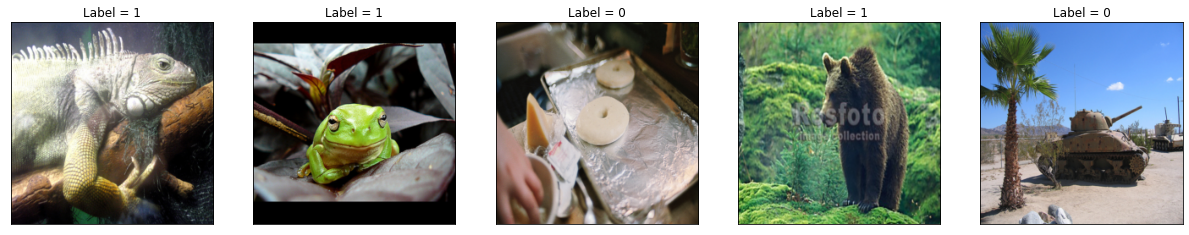

In [58]:
from utils import view_data
original = view_data(data, label, 5)

In [59]:
def expand_dim(tensor, dim, desired_dim_len):
    sz = list(tensor.size())
    sz[dim]=desired_dim_len
    return tensor.expand(tuple(sz))

In [60]:
grid_base = expand_dim(grid_test, 0, batch_size)

In [61]:
grid_base.shape

torch.Size([5, 240, 240, 2])

In [62]:
transformed_data = F.grid_sample(data, grid_base)

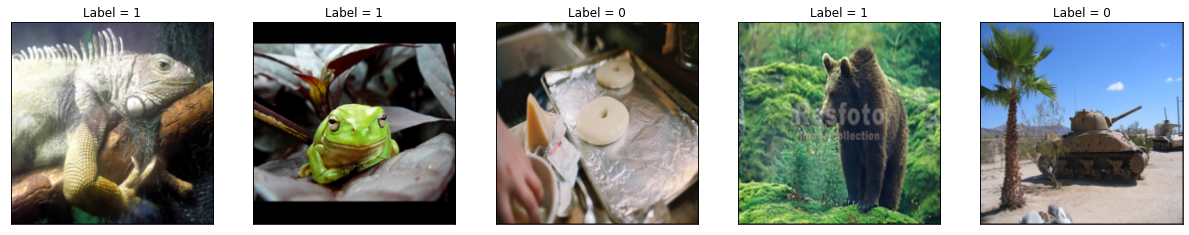

In [63]:
transformed = view_data(transformed_data, label, 5)

# Generic logPolar

In [126]:
rs = torch.logspace(0, -5, image_size, base = torch.e)
ts = torch.linspace(0, torch.pi*2, image_size)

In [127]:
grid_xs = torch.outer(rs, -torch.cos(ts)) 
grid_ys = torch.outer(rs, torch.sin(ts)) 

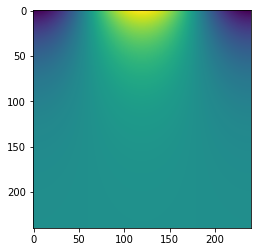

In [128]:
plt.imshow(grid_xs)

In [129]:
grid_xs = grid_xs.unsqueeze(0).unsqueeze(3)
grid_xs = Variable(grid_xs, requires_grad=False)

grid_ys = grid_ys.unsqueeze(0).unsqueeze(3)
grid_ys = Variable(grid_ys, requires_grad=False)

In [130]:
logPolar_grid = torch.cat((grid_xs, grid_ys), 3)

In [131]:
logPolar_grid = expand_dim(logPolar_grid, 0, batch_size)

In [132]:
logP_transformed_data = F.grid_sample(data, logPolar_grid)

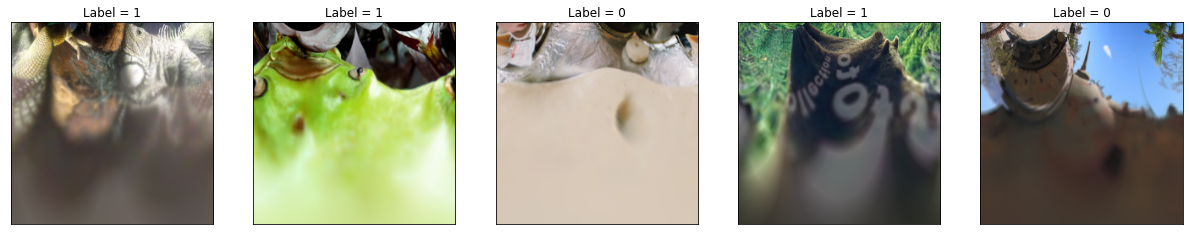

In [133]:
transformed = view_data(logP_transformed_data, label, 5)

# Center (What)

In [169]:
rs = torch.logspace(-3, -6, image_size, base = 2)
ts = torch.linspace(0, torch.pi*2, image_size)

In [170]:
grid_xs = torch.outer(rs, -torch.cos(ts)) 
grid_ys = torch.outer(rs, torch.sin(ts)) 

In [171]:
grid_xs = grid_xs.unsqueeze(0).unsqueeze(3)
grid_xs = Variable(grid_xs, requires_grad=False)

grid_ys = grid_ys.unsqueeze(0).unsqueeze(3)
grid_ys = Variable(grid_ys, requires_grad=False)

In [172]:
logPolar_grid = torch.cat((grid_xs, grid_ys), 3)

In [173]:
logPolar_grid = expand_dim(logPolar_grid, 0, batch_size)

In [174]:
logP_transformed_data = F.grid_sample(data, logPolar_grid)

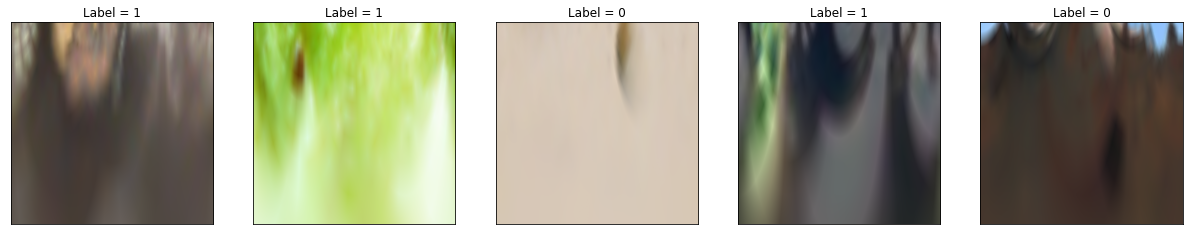

In [175]:
transformed = view_data(logP_transformed_data, label, 5)

# Surround (Where)

In [176]:
rs = torch.logspace(0, -3, image_size, base = 2)
ts = torch.linspace(0, torch.pi*2, image_size)

In [177]:
grid_xs = torch.outer(rs, -torch.cos(ts)) 
grid_ys = torch.outer(rs, torch.sin(ts)) 

In [178]:
grid_xs = grid_xs.unsqueeze(0).unsqueeze(3)
grid_xs = Variable(grid_xs, requires_grad=False)

grid_ys = grid_ys.unsqueeze(0).unsqueeze(3)
grid_ys = Variable(grid_ys, requires_grad=False)

In [179]:
logPolar_grid = torch.cat((grid_xs, grid_ys), 3)

In [180]:
logPolar_grid = expand_dim(logPolar_grid, 0, batch_size)

In [181]:
logP_transformed_data = F.grid_sample(data, logPolar_grid)

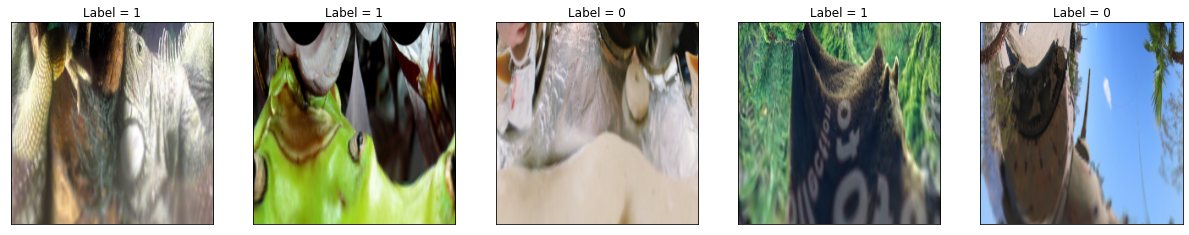

In [182]:
transformed = view_data(logP_transformed_data, label, 5)